# Version Elèves

## Exemple AD sur le dataset Vote.

## Kernel = Python3

---

## Importantion des libraries

In [1]:
# Les libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz # Import Decision Tree Regresser
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing # To manage non numeric attributes
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, r2_score
import graphviz
import re

**Acquisiton des données**

In [2]:
# Please choose between cars.csv or vote.csv and check which delimiter to use
file = "vote.csv"
data = pd.read_csv(file, delimiter=",")
#print(data)

isNumericClassValue = pd.api.types.is_numeric_dtype(data[data.columns[-1]])
data.head()

,Handicapped Infants,Water project cost sharing,Adoption of the budget resolution,Physician fee freeze,El salvador aid,Religious group in school,Anti satellite test ban,Aid to nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export administration act south africa,Class
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat


#### On constate que les données sont 'y', 'n' et '?' (hormis la classe finale qui est un str)     
#### Il faudra transformer le 'y' et 'n' en numérique (1 et 0) et se débarasser des '?' (valeur inconnue).

**Preprocessing**

*Choisir si l'on supprime ou remplace les lignes avec des données manquantes à l'aide de la variable __deleteRows__.*

On accède aux infos sur le  nbr de données par "data.index" (qui peut être utile pour p. ex. boucler sur les lignes des données).    
Pour ensuite avoir chacun des infos, on utilise la notation pointée. P. ex, data.index.start/.stop/step

In [3]:
data.index

RangeIndex(start=0, stop=435, step=1)

In [4]:
print(type(data.index))
# Trop long, ca donne toutes les données ?
print(list(data.index)[:10])

<class 'pandas.core.indexes.range.RangeIndex'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Ci-dessous :  Mettre ";" si on ne veux pas que la réponse soit affichée.

In [5]:
list(data.index);
# Donnera une liste [0 .... 434] , i.e. le range des num lignes des données
# Utile pour écrire des boucles 'for'

Pour voir le contenu de data.index, on fait des petite boucle 'for' (2 façons)

In [6]:
for i in list(data.index) :
    print (i)
    if i > 10 : break  # on arrête à 10. Ca suffit poour la démonstrations !

0
1
2
3
4
5
6
7
8
9
10
11


In [7]:
len(data.index) 
# si 'data.index' est la liste des num des lignes des données, ssa taille est 435 !

435

  
On fait un save de data pour la suite.

In [8]:
save_data=data.copy()
save_data.shape

(435, 17)

## NB :
La BD contient beaucoup de '?' : valeur inconnues.     
Si on veut juste supprimer les lignes qui contiennent '?', 
<font color="red"> il suffit de faire </font> comme la cellule suivante.      
<u>ATTENTION</u> : mais ceci  enlève la moitié des lignes


In [9]:
data_bis = data[(data!="?").all(1)]
data_bis

,Handicapped Infants,Water project cost sharing,Adoption of the budget resolution,Physician fee freeze,El salvador aid,Religious group in school,Anti satellite test ban,Aid to nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export administration act south africa,Class
5,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y,democrat
8,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y,republican
19,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y,democrat
23,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y,democrat
25,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,n,y,y,n,n,y,y,y,y,n,y,n,n,y,y,y,democrat
426,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y,democrat
427,n,n,n,y,y,y,y,y,n,y,n,y,y,y,n,y,republican
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican


In [10]:
data_bis.shape

(232, 17)

On constate donc que cela enlève beaucoup de lignes : on passe de 435 à 232 lignes. **C'est dommage !**  

### L'idée :
- passer d'abord en numérique puis remplacer les '?' par la médiane de la colonne.
     
Evidemment, la médiane n'existe pas pour les non numériques (mais la valeur majoritaire existe ! Cela peut être une autre solution non suivie ici).

In [11]:

data.head()

,Handicapped Infants,Water project cost sharing,Adoption of the budget resolution,Physician fee freeze,El salvador aid,Religious group in school,Anti satellite test ban,Aid to nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export administration act south africa,Class
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat


In [12]:
data.shape

(435, 17)

### On va donc transformer le dataframe en numérique (0/1) et se débarasser des '?'

## The Best façon de se débarasser des '?" :    
- On remplace 'y' et 'n' par 1/0 puis on mettra la médiane de la colopnne pour les '?'
- <font color="red"> A tester :</font> essayer la valeur majoritaire mais sur le 'data' d'origine  avec 'y' et 'n'.

### (Sol 1) : Meilleure méthode pour remplacer 'y' par 1 et 'n' par 0 (les '?' restent pour l'instant)


In [13]:
import numpy as np

data.replace({'y': 1, 'n': 0}, inplace=True) # data modifié "sur place"


# Si on voulait : 
# OK : data.replace('?', np.NaN)
# OU 
# data.replace({'?' :  np.NaN}, inplace=True)
data.head()

,Handicapped Infants,Water project cost sharing,Adoption of the budget resolution,Physician fee freeze,El salvador aid,Religious group in school,Anti satellite test ban,Aid to nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export administration act south africa,Class
0,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1,republican
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?,republican
2,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0,democrat
3,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1,democrat
4,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1,democrat


#### Ici : data est devenu 0/1 au lieu de 'y'/'n' et on a toujours les "?"

### (sol2) : Une autres méthodes : 
#### Cette méthode marche aussi (remplace 'y' par 1 et 'n' par 0, les '?' restent pour l'instant)

Pour remplacer 'y' par 1 et 'n' par 0


In [14]:
# On restore d'abord le dataframe
data=save_data.copy()
data.head(5)


,Handicapped Infants,Water project cost sharing,Adoption of the budget resolution,Physician fee freeze,El salvador aid,Religious group in school,Anti satellite test ban,Aid to nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export administration act south africa,Class
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat


### Puis on remplace 'y' et 'n' (les '?' restent encore !)

In [15]:
df=data.replace(to_replace="y",value=1)
df=df.replace(to_replace="n",value=0)
df.head()

,Handicapped Infants,Water project cost sharing,Adoption of the budget resolution,Physician fee freeze,El salvador aid,Religious group in school,Anti satellite test ban,Aid to nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export administration act south africa,Class
0,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1,republican
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?,republican
2,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0,democrat
3,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1,democrat
4,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1,democrat


### (Sol3) :  cette méthode marche MAIS pour une col. On peut l'appliquer la la BD dans une boucle 'for'
### Pour le test, on remplace '?' par 42 (juste pour l'exemple)

In [16]:
# Ce code montre que l'on pourrait traiter les '?' dans la foulée.
data=save_data.copy()

data["Handicapped Infants"] = data["Handicapped Infants"].map( {'n':0 , 'y':1, '?':42} )
data.head()


,Handicapped Infants,Water project cost sharing,Adoption of the budget resolution,Physician fee freeze,El salvador aid,Religious group in school,Anti satellite test ban,Aid to nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export administration act south africa,Class
0,0,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,0,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,42,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,0,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,1,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat


---

### Donc la méthode qui marche le mieux (la toute première, on la remet !)

In [17]:
data=save_data.copy()
data.replace({'y': 1, 'n': 0}, inplace=True)

data.head()

,Handicapped Infants,Water project cost sharing,Adoption of the budget resolution,Physician fee freeze,El salvador aid,Religious group in school,Anti satellite test ban,Aid to nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export administration act south africa,Class
0,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1,republican
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?,republican
2,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0,democrat
3,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1,democrat
4,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1,democrat


In [18]:
# On sauvegarde pour les manips
data_0_1_save=data.copy()

In [19]:
# Rappel data
data.head()

,Handicapped Infants,Water project cost sharing,Adoption of the budget resolution,Physician fee freeze,El salvador aid,Religious group in school,Anti satellite test ban,Aid to nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export administration act south africa,Class
0,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1,republican
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?,republican
2,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0,democrat
3,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1,democrat
4,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1,democrat


### Remplacement des '?'
#### On va plutot remplacer les '?' par le mode des valeurs (mode=médiane)

In [20]:
# mediane de la 1e col 
data["Handicapped Infants"].mode()

0    0
Name: Handicapped Infants, dtype: object

In [21]:
# Médiane de toutes les colonnes
mediane_des_cols=data.mode() 
mediane_des_cols


,Handicapped Infants,Water project cost sharing,Adoption of the budget resolution,Physician fee freeze,El salvador aid,Religious group in school,Anti satellite test ban,Aid to nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export administration act south africa,Class
0,0,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,democrat


In [22]:
# mediane de la 2e col 
mediane_des_cols["Water project cost sharing"]
#  ATTENTOIN  : le résulta est une série de pandas (avec une seule valeur). ce n'est pas un entier

0    1
Name: Water project cost sharing, dtype: object

In [23]:
# ATTENTION : mediane_des_cols est un dataframe 
type(mediane_des_cols)

pandas.core.frame.DataFrame

### L'accès à la ligne du dataframe des médianes.
#### Pou raccéder effectivement aux médiane, on écrit :


In [24]:
data.mode().iloc[0]

Handicapped Infants                              0
Water project cost sharing                       1
Adoption of the budget resolution                1
Physician fee freeze                             0
El salvador aid                                  1
Religious group in school                        1
Anti satellite test ban                          1
Aid to nicaraguan contras                        1
Mx missile                                       1
Immigration                                      1
Synfuels corporation cutback                     0
Education spending                               0
Superfund right to sue                           1
Crime                                            1
Duty free exports                                0
Export administration act south africa           1
Class                                     democrat
Name: 0, dtype: object

In [25]:
# ATTENTION : La 1e ligne de ce dataframe est une série
type(data.mode().iloc[0])

pandas.core.series.Series

#### Important : accès à la valeur effective de la médiane de la 1e colonne

In [26]:
# mediane_des_cols["Handicapped Infants"]  est une série panda et on accède à l'indice 0 à la médiane
print(mediane_des_cols["Handicapped Infants"][0])
type(mediane_des_cols["Handicapped Infants"][0])

0


int

In [27]:
# On restore le dataframe (dans le doute !?)
data=data_0_1_save.copy()
data.head()

,Handicapped Infants,Water project cost sharing,Adoption of the budget resolution,Physician fee freeze,El salvador aid,Religious group in school,Anti satellite test ban,Aid to nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export administration act south africa,Class
0,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1,republican
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?,republican
2,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0,democrat
3,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1,democrat
4,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1,democrat


### Le remplacement des '?' 

 
### (Sol1) : on remplace les '?' dans chaque colonne (sauf la classe même s'il n'y a pas de '?' dans cette col) par la médiane de la colonne en question

In [28]:
data=data_0_1_save.copy()
# cette ligne est conseillée pour la compatibilité de pandas avec les nelles versions !

pd.set_option('future.no_silent_downcasting', True)
for nom in data.columns :
    print(nom)
    if nom == "Class" : continue # Ne pas le faire pour la classe
    data[nom]=data[nom].replace({'?':mediane_des_cols[nom][0]}, inplace=False)
data.head()

Handicapped Infants
Water project cost sharing
Adoption of the budget resolution
Physician fee freeze
El salvador aid
Religious group in school
Anti satellite test ban
Aid to nicaraguan contras
Mx missile
Immigration
Synfuels corporation cutback
Education spending
Superfund right to sue
Crime
Duty free exports
Export administration act south africa
Class


,Handicapped Infants,Water project cost sharing,Adoption of the budget resolution,Physician fee freeze,El salvador aid,Religious group in school,Anti satellite test ban,Aid to nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export administration act south africa,Class
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,republican
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,republican
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,democrat
3,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,democrat
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,democrat


#### On constate le remplacement des '?'

## (sol2) : Cette technique directe (sans passer par NaN) marche aussi

N.B. : Sur le WEB, beaucoup proposent de passer par NaN d'abord puisqu'enuite, il y a une fonction qui passe de NaN à n'importe quelle valeur

In [29]:
data=data_0_1_save.copy()
data.replace(to_replace='?', value=data.mode().iloc[0],  inplace=True)
data.head()

,Handicapped Infants,Water project cost sharing,Adoption of the budget resolution,Physician fee freeze,El salvador aid,Religious group in school,Anti satellite test ban,Aid to nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export administration act south africa,Class
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,republican
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,republican
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,democrat
3,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,democrat
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,democrat


### (Sol 3) : une autre technique pour remplacer facilement les '?' par la médiane
#### Ici, d'abord, on change '?' en NaN puis "fillna"

In [30]:
data=data_0_1_save.copy()
data.replace({"?":np.nan}, inplace=True)
data_tout_0_1=data.fillna(data.mode().iloc[0])
data_tout_0_1.head()

,Handicapped Infants,Water project cost sharing,Adoption of the budget resolution,Physician fee freeze,El salvador aid,Religious group in school,Anti satellite test ban,Aid to nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export administration act south africa,Class
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,republican
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,republican
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,democrat
3,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,democrat
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,democrat


## Ici, on n'a que des 0/1
Ici : "data"  et "data_tout_0_1" sont correctes. 

## Vers  la construction de l'arbre de décision

In [31]:
X_names = data.columns[:-1] # tout sauf la dernière colonne
y_name = data.columns[-1] # dernière colonne
X_names,y_name

(Index(['Handicapped Infants', 'Water project cost sharing',
        'Adoption of the budget resolution', 'Physician fee freeze',
        'El salvador aid', 'Religious group in school',
        'Anti satellite test ban', 'Aid to nicaraguan contras', 'Mx missile',
        'Immigration', 'Synfuels corporation cutback', 'Education spending',
        'Superfund right to sue', 'Crime', 'Duty free exports',
        'Export administration act south africa'],
       dtype='object'),
 'Class')

In [32]:
X=data[X_names]
y=data[y_name]
X,y

(    Handicapped Infants Water project cost sharing  \
 0                     0                          1   
 1                     0                          1   
 2                   NaN                          1   
 3                     0                          1   
 4                     1                          1   
 ..                  ...                        ...   
 430                   0                          0   
 431                   0                          0   
 432                   0                        NaN   
 433                   0                          0   
 434                   0                          1   
 
     Adoption of the budget resolution Physician fee freeze El salvador aid  \
 0                                   0                    1               1   
 1                                   0                    1               1   
 2                                   1                  NaN               1   
 3                    

#### Découpage en ensembles de train / test (20%)

In [33]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [34]:
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((348, 16), (87, 16), (348,), (87,))

In [35]:
save_data=data.copy()
save_X=X.copy()
save_y=y.copy()

## Construction de l'arbre de décision (Gini)    
### A propos du paramère ccp_alpha      
_ccp_alpha_ est un réel non-negative  avec par défaut = 0.     
Ce Paramètre de **complexité du modèle** est utilisé pour l’élagage cout-complexité  minimal.      
Le sous-arbre avec la plus grande cout-complexité  inférieure à ccp_alpha sera choisi.      
Par défaut, aucun élagage n’est effectué. 
 

In [36]:
prunning = False
if prunning:
    alpha = 0.1
else:
    alpha = 0.0

# classifier = DecisionTreeRegressor(ccp_alpha = alpha)
classifier1_sans_elagage_gini = DecisionTreeClassifier(ccp_alpha = alpha)
decisionTree1_sans_elagage_gini = classifier1_sans_elagage_gini.fit(xTrain,yTrain)

# Get tree as a graphviz object
classNames = list(set(data[data.columns[-1]]))

graphData = export_graphviz(
    classifier1_sans_elagage_gini,
    feature_names=X_names,
    class_names=classNames,
    filled=True,
    rounded=True,
    out_file=None,
)

# Set graph size
index = graphData.find('{\n')
graphData = graphData[:index+1] +'\ngraph [size="10"]' + graphData[index+1:]

# Remove unuseful information
graphData = re.sub(r'\\nmse = ([0-9]+.[0-9]+)','', graphData)
graphData = re.sub(r'\\nsamples = [0-9]+','', graphData)
matcher = re.compile('label=".+",')
def valueEraser(match):
    line = match.group(0)
    if line.startswith('label="mse = '): # It is a leaf
        if isNumericClassValue:
            return line
        else:
            startIndex = line.find("value = ") + 8
            endIndex = line.find('"', startIndex) # The numberis between stqrt and endIndex
            
            value = round(float(line[startIndex:endIndex]))
            valueLabel = labelEncoder.inverse_transform([value])[0]
            
            line = line[:startIndex] + valueLabel + line[endIndex:]
            return line
    else:
        return re.sub('value = ([0-9]+.[0-9]+)','',line)
graphData = matcher.sub(valueEraser,graphData)


# Draw graph
graph = graphviz.Source(graphData)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Evaluation

In [37]:
# Use model for prediction
yPredicted = decisionTree1_sans_elagage_gini.predict(xTest)
#if not isNumericClassValue:
#    yPredicted = np.round(yPredicted).astype(int)
yPredicted

array(['democrat', 'democrat', 'republican', 'republican', 'republican',
       'republican', 'democrat', 'democrat', 'republican', 'democrat',
       'republican', 'democrat', 'republican', 'democrat', 'democrat',
       'republican', 'democrat', 'republican', 'republican', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'democrat',
       'republican', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'republican', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'republican', 'democrat', 'republican',
       'democrat', 'democrat', 'democrat', 'republican', 'republican',
       'democrat', 'democrat', 'democrat', 'republican', 'democrat',
       'democrat', 'republican', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'republican',
       'democrat', 'democrat', 'democrat', 'democrat', 'republican',
       'republican', 'democrat', 'republican', 'democrat', 'republican',
       'democrat

#### Les prédictions

In [38]:
# On construit la présentation des résultats
# Print test results
attributeCount = len(data.columns)
line = "{:<10} " * (attributeCount+1)
headers = list(xTest.columns.values)+["Output","Prediction output"]
headers

['Handicapped Infants',
 'Water project cost sharing',
 'Adoption of the budget resolution',
 'Physician fee freeze',
 'El salvador aid',
 'Religious group in school',
 'Anti satellite test ban',
 'Aid to nicaraguan contras',
 'Mx missile',
 'Immigration',
 'Synfuels corporation cutback',
 'Education spending',
 'Superfund right to sue',
 'Crime',
 'Duty free exports',
 'Export administration act south africa',
 'Output',
 'Prediction output']

### Le code ci-dessous permet simplement de créer un fichier contenant les prédictions

In [39]:
results = line.format(*headers)+"\n"
for i in range(xTest.shape[0]):
    if isNumericClassValue:
        values= list(xTest.iloc[i]) + list([yTest.iloc[i],yPredicted[i]])
    else:
        values= list(xTest.iloc[i]) + list(list([yTest.iloc[i],yPredicted[i]]))
    results+=line.format(*values)+"\n"
# print(results+"\n") # Uncomment this line to print all test results
results

'Handicapped Infants Water project cost sharing Adoption of the budget resolution Physician fee freeze El salvador aid Religious group in school Anti satellite test ban Aid to nicaraguan contras Mx missile Immigration Synfuels corporation cutback Education spending Superfund right to sue Crime      Duty free exports Export administration act south africa Output     Prediction output \n1          0          1          0          0          0          1          1          1          1          0          1          0          0          1          nan        democrat   democrat   \n1          1          1          0          0          0          1          1          1          0          0          0          0          0          1          1          democrat   democrat   \n0          0          0          1          1          1          0          0          0          1          0          1          0          1          0          1          republican republican \n0          0

### Le rapport et les metriques de test

In [40]:
# Print test metrics
if isNumericClassValue:
    print("R2 score :", round(r2_score(yTest,yPredicted),3))
else:
    print("Classification report :\n", classification_report(yTest,yPredicted))

print("Confusion matrix :\n", confusion_matrix(yTest,yPredicted))
print("\nKappa score :", round(cohen_kappa_score(yTest,yPredicted),3))

Classification report :
               precision    recall  f1-score   support

    democrat       0.96      0.96      0.96        56
  republican       0.94      0.94      0.94        31

    accuracy                           0.95        87
   macro avg       0.95      0.95      0.95        87
weighted avg       0.95      0.95      0.95        87

Confusion matrix :
 [[54  2]
 [ 2 29]]

Kappa score : 0.9


### Oi on demande à élaguer (tjs GINI)
#### Voir ci-dessus "cost_complexity_pruning_path" pour les variations d'alpha et le calcul de l'impureté <font color="red"> pour éviter de   varier alpha manuellement.</font>

In [41]:
prunning = True
if prunning:
    alpha = 0.005 # à 0.5...1 : presque pas de feuille. à 0.01, qq feuilles , ...
else:
    alpha = 0.0
    
 
# classifier = DecisionTreeRegressor(ccp_alpha = alpha)
classifier2_gini_pruned = DecisionTreeClassifier(ccp_alpha = alpha)
decisionTree2_gini_pruned = classifier2_gini_pruned.fit(xTrain,yTrain)

# Get tree as a graphviz object
classNames = list(set(data[data.columns[-1]]))

graphData = export_graphviz(
    classifier2_gini_pruned,
    feature_names=X_names,
    class_names=classNames,
    filled=True,
    rounded=True,
    out_file=None,
)

# Set graph size
index = graphData.find('{\n')
graphData = graphData[:index+1] +'\ngraph [size="10"]' + graphData[index+1:]

# Remove unuseful information
graphData = re.sub(r'\\nmse = ([0-9]+.[0-9]+)','', graphData)
graphData = re.sub(r'\\nsamples = [0-9]+','', graphData)
matcher = re.compile('label=".+",')
def valueEraser(match):
    line = match.group(0)
    if line.startswith('label="mse = '): # It is a leaf
        if isNumericClassValue:
            return line
        else:
            startIndex = line.find("value = ") + 8
            endIndex = line.find('"', startIndex) # The numberis between stqrt and endIndex
            
            value = round(float(line[startIndex:endIndex]))
            valueLabel = labelEncoder.inverse_transform([value])[0]
            
            line = line[:startIndex] + valueLabel + line[endIndex:]
            return line
    else:
        return re.sub('value = ([0-9]+.[0-9]+)','',line)
graphData = matcher.sub(valueEraser,graphData)


# Draw graph
graph = graphviz.Source(graphData)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Accuracy avec élagage

In [42]:
y_pred = classifier2_gini_pruned.predict(xTest)
print("Accuracy:", metrics.accuracy_score(yTest, y_pred))

Accuracy: 0.9425287356321839


## Arbre de décision avec entropy AVEC élagage    

#### NB: Sans élagage, l'arbre est trop complexe.


In [43]:
prunning = True
if prunning:
    alpha = 0.01
else:
    alpha = 0.0
    
classifier=decisionTree=None # pour simplement les remplacements des idents dans le texte

# classifier = DecisionTreeRegressor(ccp_alpha = alpha)
classifier3_pruned_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha = alpha)
decisionTree3_pruned_entropy = classifier3_pruned_entropy.fit(xTrain,yTrain)

# Get tree as a graphviz object
classNames = list(set(data[data.columns[-1]]))

graphData = export_graphviz(
    classifier3_pruned_entropy,
    feature_names=X_names,
    class_names=classNames,
    filled=True,
    rounded=True,
    out_file=None,
)

# Set graph size
index = graphData.find('{\n')
graphData = graphData[:index+1] +'\ngraph [size="10"]' + graphData[index+1:]

# Remove unuseful information
graphData = re.sub(r'\\nmse = ([0-9]+.[0-9]+)','', graphData)
graphData = re.sub(r'\\nsamples = [0-9]+','', graphData)
matcher = re.compile('label=".+",')
def valueEraser(match):
    line = match.group(0)
    if line.startswith('label="mse = '): # It is a leaf
        if isNumericClassValue:
            return line
        else:
            startIndex = line.find("value = ") + 8
            endIndex = line.find('"', startIndex) # The numberis between stqrt and endIndex
            
            value = round(float(line[startIndex:endIndex]))
            valueLabel = labelEncoder.inverse_transform([value])[0]
            
            line = line[:startIndex] + valueLabel + line[endIndex:]
            return line
    else:
        return re.sub('value = ([0-9]+.[0-9]+)','',line)
graphData = matcher.sub(valueEraser,graphData)


# Draw graph
graph = graphviz.Source(graphData)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [44]:
y_pred = classifier3_pruned_entropy.predict(xTest)
print("Accuracy:", metrics.accuracy_score(yTest, y_pred))

Accuracy: 0.9425287356321839


### On constate qu'avec et sans élagage, l'accuracy ne change pas beaucoup

In [45]:
# Rappel 
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(348, 16) (87, 16) (348,) (87,)


**Impureté totale des feuilles vs alphas efficaces de l'arbre élagué**    
L'élagage  pour la complexité-coût minimal trouve de manière récursive le nœud avec le "maillon le plus faible".      
Le maillon le plus faible est caractérisé par un alpha effectif, où les nœuds avec le plus petit alpha effectif sont élagués en premier.     
Pour avoir une idée des valeurs de __ccp_alpha__ qui pourraient être appropriées, scikit-learn fournit __DecisionTreeClassifier.cost_complexity_pruning_path__ qui renvoie les alphas effectifs et le total des impuretés des feuilles correspondantes à chaque étape du processus d'élagage.     

<font color="red"> **À mesure que l’alpha augmente, une plus grande partie de l’arbre est taillée, ce qui augmente l’impureté totale de ses feuilles.**</font>

In [46]:
path = classifier3_pruned_entropy.cost_complexity_pruning_path(xTrain, yTrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas, impurities

(array([0.        , 0.00357791, 0.00775379, 0.00815312, 0.00825459,
        0.00909196, 0.00932504, 0.01190146, 0.01288261, 0.01398755,
        0.01498091, 0.03401349, 0.05817464, 0.72441262]),
 array([0.00574713, 0.00932504, 0.02483263, 0.04113887, 0.04939346,
        0.05848542, 0.06781046, 0.07971192, 0.09259454, 0.12056964,
        0.15053147, 0.18454496, 0.2427196 , 0.96713222]))

##### On a ici deux listes : la liste de __alphas__ (0..0.72) et les __impuretés__ (non homogénéisés).    
On constate que l'impurté maximale (0.967)  s'obtient ici quand alpha est élevé (0.72).    
**Si alpha continue à augmenter, la taille de l'arbre diminue et donc l'impurté aussi.**    
<font color=red>  Noter bien que pour alpha=0 = pas d'élagage, l'impureté est minimale mais attention à la variance quand l'impureté baisse puisqu'on n'a pas élagué et donc le modèle est trop **complexe**. </font>

In [47]:
# xTrain, xTest, yTrain, yTest

### Comparaisons de alpha et impurté

Dans le tracé suivant, la valeur alpha effective maximale est supprimée, car il s'agit d'un arbre trivial avec un seul nœud.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

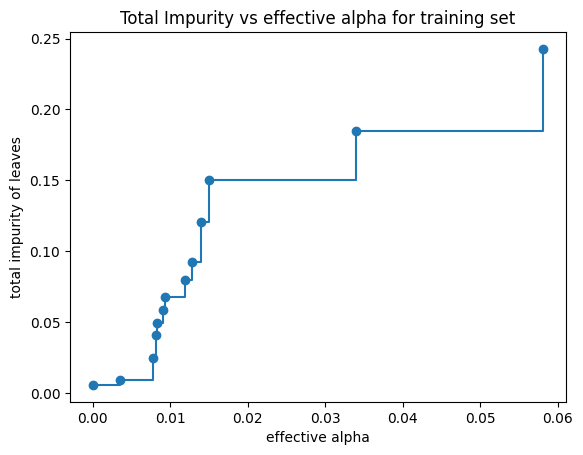

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

**Même constat et avertissement que ci-dessus sur la complexité et variance.**     
Si alpha est trop bas (presque pas d'élagage donnant un modèle trop complexe), l'impurté baisse et à l'inverse, quand alpha augmente, l'impureté augmente (le biais augmente) mais la variance baisse.    
<font color="red"> A partir de ce réusltat, on doit trouver un compromis alpha/impureté.</font>

## Suite :      
Nous construisons un arbre de décision en utilisant les alphas efficaces.     
La dernière valeur de **ccp_alphas** est la valeur **alpha** qui élague l'ensemble de l'arborescence, laissant l'arborescence clfs[-1] avec **un seul nœud**.

In [49]:
les_clfs_gini_elague = []
for ccp_alpha in ccp_alphas:
    clf_gini_elague = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_gini_elague.fit(xTrain, yTrain)
    les_clfs_gini_elague.append(clf_gini_elague)
print("Le nbr. de noeuds dans le dernier arbre est : {} avec ccp_alpha: {}".format(
        les_clfs_gini_elague[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Le nbr. de noeuds dans le dernier arbre est : 1 avec ccp_alpha: 0.724412620931852


### Suite :    
Nous supprimons le dernier élément de **clfs** et **ccp_alphas**, car il s'agit de l'arbre trivial avec un seul nœud.      
Nous montrons ici que le nombre de nœuds et la profondeur de l’arbre diminuent à mesure que alpha augmente.

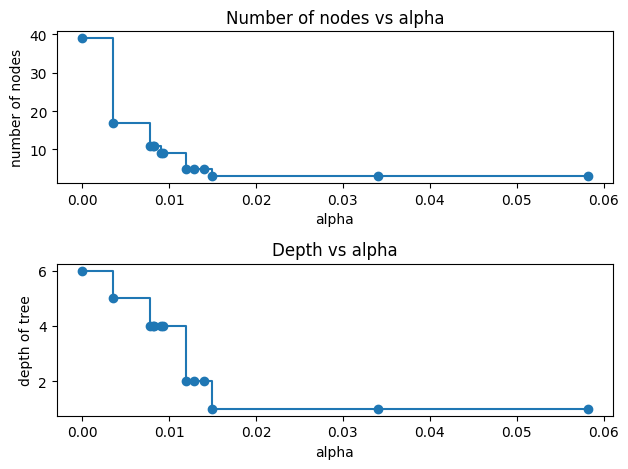

In [50]:
save_clfs=les_clfs_gini_elague.copy()
save_alphas=ccp_alphas

les_clfs_gini_elague = les_clfs_gini_elague[:-1] # on enlève le dernier
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in les_clfs_gini_elague]
depth = [clf.tree_.max_depth for clf in les_clfs_gini_elague]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Précision vs alpha pour les ensembles de training et de test :     
Lorsque ccp_alpha = zéro et que les autres paramètres par défaut de DecisionTreeClassifier sont conservés, l'arbre est over-fitted (surajusté car pas d'élagage), conduisant à une précision d'entraînement élevée et une précision de test de plus bas (qui témoigne de la gra,nde valeur de la variance conduisant à une erreur globale plus élevée dans les tests).          
À mesure que l'alpha augmente, une plus grande partie de l'arbre est élaguée, créant ainsi un arbre de décision qui se généralise mieux.     
Dans cet exemple, la justesse (précision ici) est assez élevée et la valeur de ccp_alphane ne modifie pas trop la précision des tests.  CE n'est pas le cas en phase d'apprentissage.

Pour en savoir plus, voir cette page (les exemples proposés en bas) :     
https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

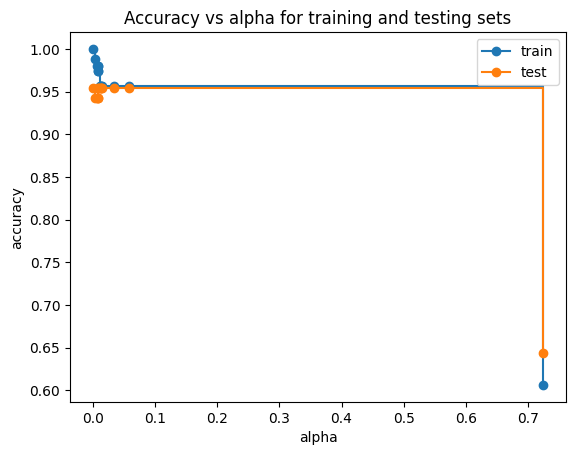

In [52]:
# Rappel : xTrain, xTest, yTrain, yTest

# Si on fait les mêmes tests avec "les_clfs_gini_elague" et "ccp_alphas" (i.e. sans enlever les derniers éléments),
# les résultats sont assez similaires.

train_scores = [clf.score(xTrain, yTrain) for clf in save_clfs]
test_scores = [clf.score(xTest, yTest) for clf in save_clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(save_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(save_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


**Apprentissahe (bleue)**   
Si alpha est quuasi nulle, l'erreur d'apprentissage est trop basse (justess presque = 1) et à mesure que alpha augmente, le biais d'apprentissage augmente (car on élague).

**Test (ortange)**     
Par contre, pour le test, la justesse ne varie pas beaucoup avec différentes valeurs d'alpha (utilisées pour apprendre).  Autrement dit, qq soit alpha, en phase de test, nous avons une erreur quasi constante (1-0.953) .         
Ici il faut garder à l'esprit que les évhelles de alpha et de la justesse (précision) sont très sérrées.   
La précision va de 0.96 à 1 et alpha va de 0 à 0.0175. Il est don cdifficile de constater des variations.

# Ici se termine le travail sur l'exemple de Vote.


---
---